# Flowers

## Imports and Variables

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

batch_size = 16
img_height = 227
img_width = 227
data_dir = "flowers/"

AUTOTUNE = tf.data.AUTOTUNE


## Data

In [2]:
x_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    crop_to_aspect_ratio=True
)

x_val = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    crop_to_aspect_ratio=True,
    
)

val_batches = tf.data.experimental.cardinality(x_val)
x_test = x_val.take(val_batches // 2)
    
class_names = x_train.class_names
num_classes = len(class_names)

print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.
Number of classes: 5
Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


## Preprocessing & Data augmentation

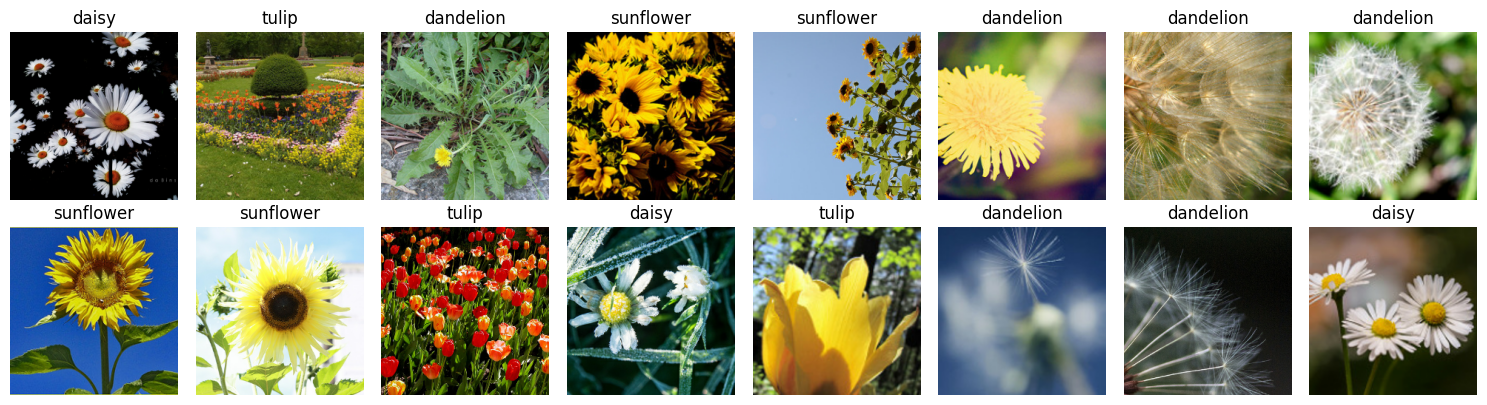

In [37]:
plt.figure(figsize=(15, 8))

for images, labels in x_train.take(1): 
    for i in range(batch_size):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.tight_layout()
plt.show()

In [38]:
def preprocess(img, label):
    return tf.image.per_image_standardization(img), label

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom((-0.2, 0.2), (-0.2, 0.2)),
    tf.keras.layers.RandomRotation(factor=(-0.1, 0.1)),
])

# Data Augmentation
x_train = x_train.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=AUTOTUNE)

# Preprocessing
x_train = x_train.map(preprocess, num_parallel_calls=AUTOTUNE)
x_val = x_val.map(preprocess, num_parallel_calls=AUTOTUNE)
x_test = x_test.map(preprocess, num_parallel_calls=AUTOTUNE)

# Prefetch the datasets for performance
x_train = x_train.cache().prefetch(buffer_size=AUTOTUNE)
x_val = x_val.cache().prefetch(buffer_size=AUTOTUNE)



## Generate model

- AlexNet
- VGG16
- ResNet
- Inception
- EfficientNet
- MobileNet

# AlexNet

In [5]:
def AlexNet(input_shape, num_classes, regularizer=None):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(input_shape))
    
    model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', kernel_regularizer=regularizer, input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(4096, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(4096, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    
    return model


# VGG16

In [7]:
def VGG16(input_shape, num_classes, regularizer=None):
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape, classes=num_classes)
    
    model = tf.keras.models.Sequential()
    model.add(base_model)
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    return model


def VGG16_manual(input_shape, num_classes, regularizer=None):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer, input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    return model

# ResNet

In [9]:
def ResNet50(input_shape, num_classes, regularizer=None):
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(pooling)

    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    return model

# Inception

In [10]:
def InceptionV3(input_shape, num_classes, regularizer=None):
    base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    
    pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    fc = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizer)(pooling)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(fc)

    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    return model


# EfficientNet

In [11]:
def EfficientNet(input_shape, num_classes, regularizer=None):
    base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

    pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    fc = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizer)(pooling)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(fc) 

    model = tf.keras.Model(inputs=base_model.input, outputs=output)

    return model


# MobileNet

In [12]:
def MobileNet(input_shape, num_classes, regularizer=None):
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    fc = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizer)(pooling)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(fc)  # Replace num_classes with your number of classes

    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    
    return model

## Model Training

In [26]:
model_no = 4  # Change based on preference

MODELS = {
    1: AlexNet,
    2: VGG16,
    3: ResNet50,
    4: InceptionV3,
    5: EfficientNet,
    6: MobileNet  # Re-run data preprocessing with input_shape=(224, 224, 3) instead
}

input_shape = (img_height, img_width, 3)
regularizer = tf.keras.regularizers.l2(0.01)
model = MODELS[model_no](input_shape, num_classes, regularizer)
    
lr = 1e-4
ADAM = tf.keras.optimizers.Adam(lr)
SGDplus = tf.keras.optimizers.SGD(lr, momentum=0.9)
model.compile(optimizer=ADAM,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 113, 113, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 113, 113, 32  96         ['conv2d_5[0][0]']               
 rmalization)                   )                                                           

In [28]:
REDUCE_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=1/3, patience=5)
LR_SCHEDULER = tf.keras.callbacks.LearningRateScheduler(lambda epoch, _: lr * (1/3) ** (epoch//10), verbose=0)
EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    x_train,
    validation_data=x_val,
    epochs=1000,
    callbacks=[REDUCE_LR, EARLY_STOPPING]
)

Epoch 1/1000
216/216 [==============================] - 41s 187ms/step - loss: 8.5987 - accuracy: 0.8972 - val_loss: 6.5531 - val_accuracy: 0.8980 - lr: 1.0000e-04
Epoch 2/1000
216/216 [==============================] - 38s 176ms/step - loss: 4.9081 - accuracy: 0.9479 - val_loss: 3.8279 - val_accuracy: 0.9027 - lr: 1.0000e-04
Epoch 3/1000
216/216 [==============================] - 38s 176ms/step - loss: 2.7688 - accuracy: 0.9638 - val_loss: 2.3017 - val_accuracy: 0.9050 - lr: 1.0000e-04
Epoch 4/1000
216/216 [==============================] - 38s 175ms/step - loss: 1.5664 - accuracy: 0.9745 - val_loss: 1.5914 - val_accuracy: 0.8714 - lr: 1.0000e-04
Epoch 5/1000
216/216 [==============================] - 38s 176ms/step - loss: 0.8808 - accuracy: 0.9763 - val_loss: 0.9291 - val_accuracy: 0.9096 - lr: 1.0000e-04
Epoch 6/1000
216/216 [==============================] - 38s 176ms/step - loss: 0.5287 - accuracy: 0.9699 - val_loss: 0.7037 - val_accuracy: 0.8969 - lr: 1.0000e-04
Epoch 7/1000
216

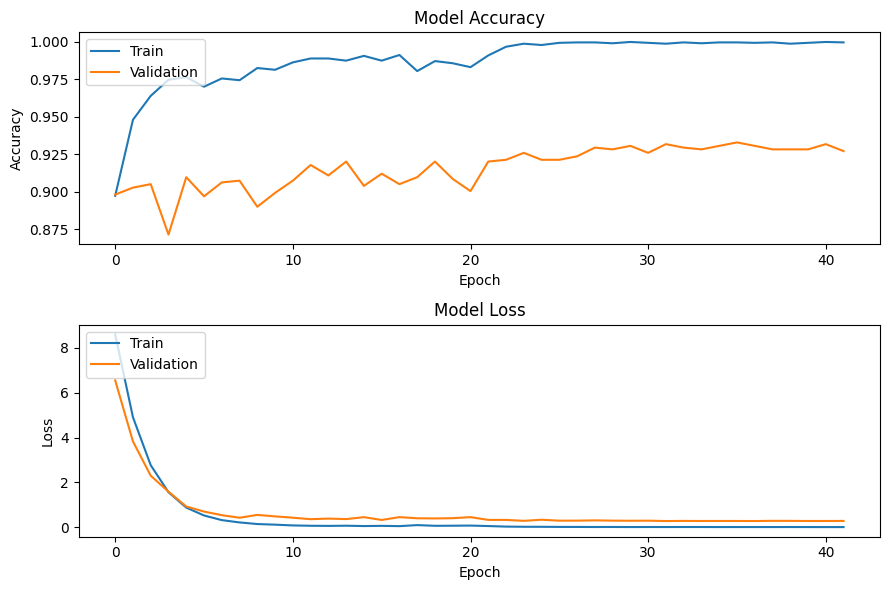

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=(9, 6))

# Plot accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [31]:
# Save model
model.save('Models/ResNet50.h5')

## Results & evaluation

In [47]:
# Load pretrained models if needed
model = tf.keras.models.load_model('Models/VGG16.h5')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 4096)              102764544 
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 5)                

In [44]:
# Evaluate on test data
results = model.evaluate(x_test)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

27/27 [==============================] - 1s 15ms/step - loss: 263.2511 - accuracy: 0.3102
Test Loss: 263.2510681152344
Test Accuracy: 0.31018519401550293


### Visualize Convolution Layers (Generated by ChatGPT)

In [39]:
def load_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
    img_tensor = tf.image.resize_with_pad(img, img_height, img_width)
    img_tensor = tf.image.per_image_standardization(img)
    img_tensor = tf.expand_dims(img_tensor, axis=0)
    return img_tensor

def create_activation_model(model, layer_index):
    layer_outputs = model.layers[layer_index].output
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    return activation_model

def visualize_filters(activation, num_filters):
    rows = round(num_filters ** 0.5) + 1
    cols = rows
    _, axes = plt.subplots(rows, cols, figsize=(20, 20))
    axes = axes.flatten()
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(activation[0, :, :, i], cmap='viridis')
        ax.axis('off')
    for i in range(num_filters, len(axes)):
        axes[i].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout() 
    plt.show()

image_path = 'Training Pictures/sunflower.jpg'
img_tensor = load_image(image_path)

layer_indices = [1, 4, 7, 9, 11]  # AlexNet 

# Visualize filters for each convolutional layer
for layer_index in layer_indices:
    activation_model = create_activation_model(model, layer_index)
    activations = activation_model.predict(img_tensor)
    num_filters = activations.shape[-1]
    print(f"Layer {layer_index} has {num_filters} filters.")
    visualize_filters(activations, num_filters)

ValueError: Attempt to convert a value (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1404x1555 at 0x1E26E01C9A0>) with an unsupported type (<class 'PIL.JpegImagePlugin.JpegImageFile'>) to a Tensor.

## Confusion Matrix

In [48]:
y_true = []
y_pred = []

for images, labels in x_test:
    predictions = model(images, training=False)
    predicted_classes = tf.argmax(predictions, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_classes.numpy())

y_test, y_hat = tf.convert_to_tensor(y_true), tf.convert_to_tensor(y_pred)

confusion = tf.math.confusion_matrix(
    y_test,
    y_hat,
    num_classes=5,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
).numpy()

print(confusion)

[[62  2  3  1  1]
 [ 6 84  3  2  0]
 [ 3  2 75  1 10]
 [ 3  3  0 59  1]
 [ 4  2 11  4 90]]


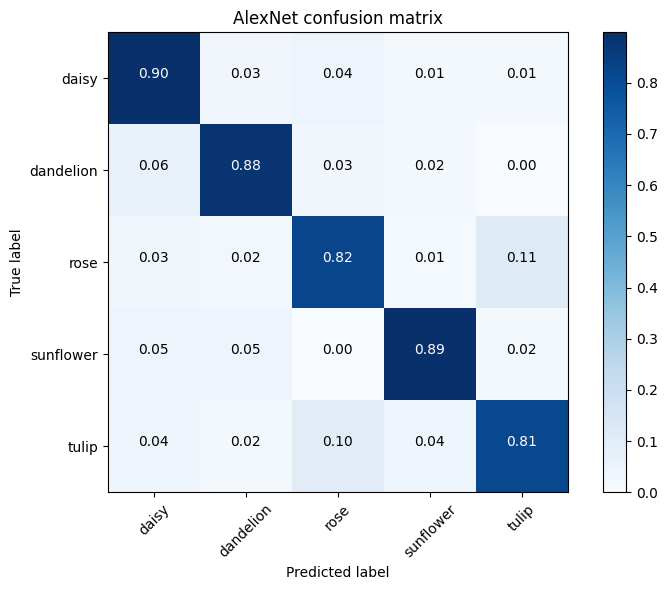

In [49]:
import itertools

title="AlexNet confusion matrix"
classes = class_names
cm = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
